# Global renewable energy analysis - Hypothesis testing

**Objective**
In this notebook we will provide deeper insight towards satisfying the business requirements of understanding global trends in renewable energy. We will do this by testing specific hypotheses outlined below using a combination of advanced visualisations and machine learning techniques.

**Hypotheses**
- **H1:** Historical growth in renewables is linked to a country's gross domestic product (GDP). Countries with higher GDP have slower growth in fossil fuel consumption (they already peaked) and faster growth in renewables. In contrast, emerging economies (those with lower GDP) still show strong growth in fossil fuel consumption.

- **H2:** Predicting the green energy transition. Renewable production will continue to increase over the next decade, accelerating the transition to green energy. The rate of this growth will vary geographically, with some countries leading the way in the green energy transition. 

- **H3:** Energy mix varies geographically. Groups of countries have emerged which have similar energy profiles (investment in different types of energy), higlighting the need for countries to optimise their use of local natural resources and conditions.

**Input**
- Cleaned dataset of energy production and consumption from 1982-2022 per country ('world_energy_consumption_cleaned.csv') 
- Five-year summary (2018-2022) of energy production and consumption (average and total) per country ('world_energy_consumption_last5_summary.csv')

**Output**



## Load data and libraries

In [1]:
#import libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  
import plotly.express as px

In [2]:
#Check working directory
#change to correct directory if needed
os.chdir('c:\\Users\\User\\OneDrive\\Documents\\Code Institute Data Analytics and AI\\Capstone project - renewables\\global_renewable_energy_analysis')
current_dir = os.getcwd()
current_dir #show cwd

'c:\\Users\\User\\OneDrive\\Documents\\Code Institute Data Analytics and AI\\Capstone project - renewables\\global_renewable_energy_analysis'

In [3]:
#load data
df = pd.read_csv('./data/world_energy_consumption_cleaned.csv')
df_last5 = pd.read_csv('./data/world_energy_consumption_last5_summary.csv')
df.head()

,country,iso_code,year,population,gdp,continent,sub_region,per_capita_electricity,energy_per_capita,energy_per_gdp,...,renewables_elec_per_capita,renewables_energy_per_capita,renewables_cons_change_pct,renewables_share_energy,renewables_share_elec,fossil_elec_per_capita,fossil_energy_per_capita,fossil_cons_change_pct,fossil_share_energy,fossil_share_elec
0,Afghanistan,AFG,1982,10088290.0,1.598041e+10,Asia,Southern Asia,NaN,926.651,0.585,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,1983,9951447.0,1.675533e+10,Asia,Southern Asia,NaN,1149.196,0.683,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,1984,10243689.0,1.707215e+10,Asia,Southern Asia,NaN,1121.573,0.673,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,AFG,1985,10512220.0,1.710848e+10,Asia,Southern Asia,NaN,1067.071,0.656,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,AFG,1986,10448447.0,1.764135e+10,Asia,Southern Asia,NaN,1097.040,0.650,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## H1: Historical trends

Historical growth in renewables is linked to a country's gross domestic product (GDP). Countries with higher GDP have slower growth in fossil fuel consumption (they already peaked) and faster growth in renewables. In contrast, emerging economies (those with lower GDP) still show strong growth in fossil fuel consumption.

Prediction: fossil fuel growth (percentage annual change) will show a negative relationship with GDP, while growth in renewables (percentage annual change) will show a positive relationship with GDP.

Let's plot percentage annual growth in renewables and fossil fuels against GDP per country (averages over the last 5 years). We will add in a global average as a baseline for comparison.

In [4]:
# Get global average for last 5 years in percent growth and gdp columns
global_avg = df[df['year']>=2018][['renewables_cons_change_pct', 'fossil_cons_change_pct', 'gdp']].mean().rename(index={
    'renewables_cons_change_pct': 'renewables_cons_change_pct_mean',
    'fossil_cons_change_pct': 'fossil_cons_change_pct_mean',
    'gdp': 'gdp_mean'
}).to_frame().T

global_avg['country_'] = 'Global'#add country_ column with value 'Global'
#global_avg

# extract the same columns from df_last5 for plotting
df_last5_plot = df_last5[['country_', 'renewables_cons_change_pct_mean', 'fossil_cons_change_pct_mean', 'gdp_mean']]
#append global average row to df_last5_plot
df_last5_plot = pd.concat([df_last5_plot, global_avg], ignore_index=True)
df_last5_plot['country_'].value_counts()


country_
Afghanistan    1
Palestine      1
New Zealand    1
Nicaragua      1
Niger          1
              ..
Gibraltar      1
Greece         1
Greenland      1
Grenada        1
Global         1
Name: count, Length: 217, dtype: int64

### Fossil fuel growth vs GDP

In [21]:
#plot fossil fuel consumption change pct vs gdp

# Get the 'Global' datapoint
global_row = df_last5_plot[df_last5_plot['country_'] == 'Global'].iloc[0]
global_gdp = global_row['gdp_mean']
global_fossil = global_row['fossil_cons_change_pct_mean']

fig = px.scatter(
    df_last5_plot,
    x='gdp_mean',
    y='fossil_cons_change_pct_mean',
    hover_name='country_',
    title='Growth in Fossil Fuel Consumption vs GDP per country (averaged over last 5 years)',
    labels={
        'gdp_mean': 'GDP (log-transformed)',
        'fossil_cons_change_pct_mean': 'Percentage growth in fossil fuel consumption'
    },
    log_x=True,
    trendline='ols',
    template='plotly_white',
    symbol=df_last5_plot['country_'].apply(lambda x: 'star' if x == 'Global' else 'circle'),
    color=df_last5_plot['country_'].apply(lambda x: 'red' if x == 'Global' else 'blue'),
)

# Add horizontal and vertical lines for the 'Global' datapoint
fig.add_vline(x=global_gdp, line_dash="dash", line_color="red", annotation_text="Global GDP", annotation_position="top left")
fig.add_hline(y=global_fossil, line_dash="dash", line_color="red", annotation_text="Global Fossil Growth", annotation_position="bottom right")

fig.update_layout(showlegend=False)  # Remove legend

fig.show()

#ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed
#update package and restart kernel

Now let's test this relationship with an OLS regression analysis. We'll use the dataset without the 'global' datapoint as this isn't a real value we want to include.

Fit the model:

In [27]:
#regression analysis of fossil fuel consumption change pct vs gdp

#first we need to log-transform the gdp values
df_last5['gdp_mean_log'] = np.log(df_last5['gdp_mean'])
df_h1_test = df_last5.dropna(subset=['fossil_cons_change_pct_mean', 'gdp_mean_log'])

#perform linear regression
import statsmodels.api as sm
X = df_h1_test[['gdp_mean_log']]
y = df_h1_test['fossil_cons_change_pct_mean']
X = sm.add_constant(X)  # add constant term for intercept
model = sm.OLS(y, X).fit()

Evaluate the model fit using diagnostic plots. These plots allow us to check key model assumptions like linearity and homoscedasticity (constant variance of residuals). The plots include fitted vs actual data, and residuals vs independent variable. We want to see random scatter with no obvious patterns here, and check that the linear trend is a reasonable fit. 

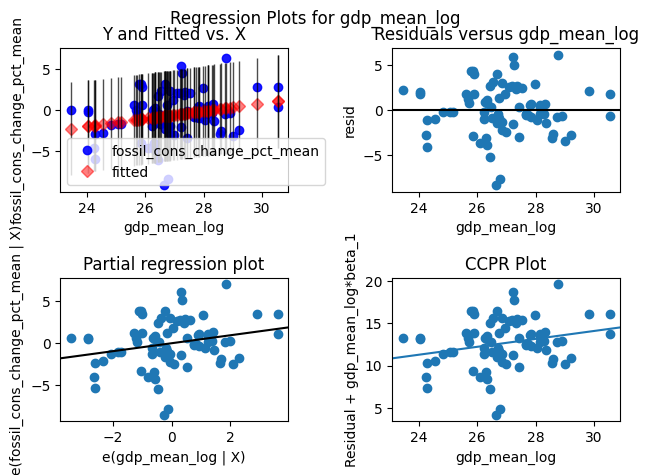

In [28]:
import statsmodels.api as sm
fig = sm.graphics.plot_regress_exog(model, 'gdp_mean_log')
plt.show()

View model results

In [29]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:     fossil_cons_change_pct_mean   R-squared:                       0.058
Model:                                     OLS   Adj. R-squared:                  0.046
Method:                          Least Squares   F-statistic:                     4.757
Date:                         Mon, 03 Nov 2025   Prob (F-statistic):             0.0322
Time:                                 14:39:49   Log-Likelihood:                -190.20
No. Observations:                           79   AIC:                             384.4
Df Residuals:                               77   BIC:                             389.1
Df Model:                                    1                                         
Covariance Type:                     nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

In [ ]:
#evaluate p-value for gdp_mean_log coefficient
p_value = model.pvalues['gdp_mean_log'].round(4)
print(f"P-value for GDP coefficient: {p_value}")
if p_value < 0.05:
    print("Reject null hypothesis: there is a significant relationship between GDP and fossil fuel consumption growth.")
else:
    print("Fail to reject null hypothesis: no significant relationship between GDP and fossil fuel consumption growth.")

P-value for GDP coefficient: 0.0322
Reject null hypothesis: there is a significant relationship between GDP and fossil fuel consumption growth.


**Conclusion:** based on data from the last 5 years, there is no relationship between a country's GDP and their annual growth in fossil fuel consumption (on average). 
Globally, over the last 5 years fossil fuel consumption has decreased by -0.62% on average. Countries like Vietnam and Bangladesh show some of the highest growth in fossil fuel consumption (around 5% on average over the last 5 years) while their average GDP is similar to the global average. In contrast, countries like Hong Kong and Ukraine have average GDP's below the global average, but have shown a reduction in fossil fuels of aorund 8-9% on average over the last 5 years.

### Renewables growth vs GDP

First, let's visualise the relationship

In [37]:
#plot renewables consumption change pct vs gdp

# Get the 'Global' datapoint
global_row = df_last5_plot[df_last5_plot['country_'] == 'Global'].iloc[0]
global_gdp = global_row['gdp_mean']
global_renew = global_row['renewables_cons_change_pct_mean']

fig = px.scatter(
    df_last5_plot,
    x='gdp_mean',
    y='renewables_cons_change_pct_mean',
    hover_name='country_',
    title='Growth in Renewables Consumption vs GDP per country (averaged over last 5 years)',
    labels={
        'gdp_mean': 'GDP (log-transformed)',
        'renewables_cons_change_pct_mean': 'Percentage growth in Renewables consumption'
    },
    log_x=True,
    trendline='ols',
    template='plotly_white',
    symbol=df_last5_plot['country_'].apply(lambda x: 'star' if x == 'Global' else 'circle'),
    color=df_last5_plot['country_'].apply(lambda x: 'red' if x == 'Global' else 'green'),
)

# Add horizontal and vertical lines for the 'Global' datapoint
fig.add_vline(x=global_gdp, line_dash="dash", line_color="red", annotation_text="Global GDP", annotation_position="top left")
fig.add_hline(y=global_renew, line_dash="dash", line_color="red", annotation_text="Global Renewables Growth", annotation_position="bottom right")

fig.update_layout(showlegend=False)  # Remove legend

fig.show()

Now let's fit the model

In [33]:
#regression analysis of fossil fuel consumption change pct vs gdp

#first we need to log-transform the gdp values
df_last5['gdp_mean_log'] = np.log(df_last5['gdp_mean'])
df_h1_test = df_last5.dropna(subset=['renewables_cons_change_pct_mean', 'gdp_mean_log'])

#perform linear regression
X = df_h1_test[['gdp_mean_log']]
y = df_h1_test['renewables_cons_change_pct_mean']
X = sm.add_constant(X)  # add constant term for intercept
model = sm.OLS(y, X).fit()

Evaluate the mode fit

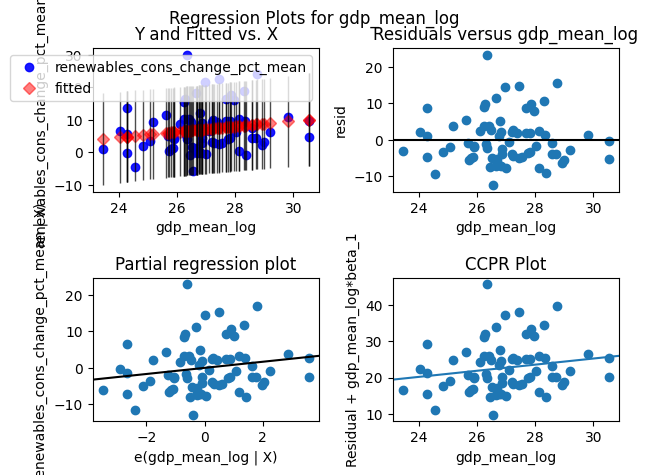

In [34]:
fig = sm.graphics.plot_regress_exog(model, 'gdp_mean_log')
plt.show()

View model output

In [35]:
print(model.summary())

#evaluate p-value for gdp_mean_log coefficient
p_value = model.pvalues['gdp_mean_log'].round(4)
print(f"P-value for GDP coefficient: {p_value}")
if p_value < 0.05:
    print("Reject null hypothesis: there is a significant relationship between GDP and fossil fuel consumption growth.")
else:
    print("Fail to reject null hypothesis: no significant relationship between GDP and fossil fuel consumption growth.")

                                   OLS Regression Results                                  
Dep. Variable:     renewables_cons_change_pct_mean   R-squared:                       0.031
Model:                                         OLS   Adj. R-squared:                  0.017
Method:                              Least Squares   F-statistic:                     2.251
Date:                             Mon, 03 Nov 2025   Prob (F-statistic):              0.138
Time:                                     14:41:24   Log-Likelihood:                -242.74
No. Observations:                               73   AIC:                             489.5
Df Residuals:                                   71   BIC:                             494.1
Df Model:                                        1                                         
Covariance Type:                         nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]

**Conclusion:** Based on the data for the last 5 years, there is no relationship between a country's average GDP and the average annual percentage growth in renewables. Countries such as Israel, Indonesia, Netherlands and Iraq have all shown growth of over 20% on average over the last 5 years, and are both above (Indonesia, Netherlands) and below (Israel ,Iraq) the global average GDP. Latvia and Uzbekistan have shown the fastest reduction in renewables consumption over the last 5 years, on average around 5-6%.